# MVD 2. Cvičení

Potřebné knihovny
- plotly
- matplotlib
- sklearn
- numpy
- pickle

## 1. část - Základní vizualizace dat

Úkolem v první části je vyzkoušet si základní vizualizaci s využitím knihoven Matplotlib a Plotly. Postačí vizualizovat základní sloupcový graf v každé z těchto knihoven s hodnotami [1, 2, 3].

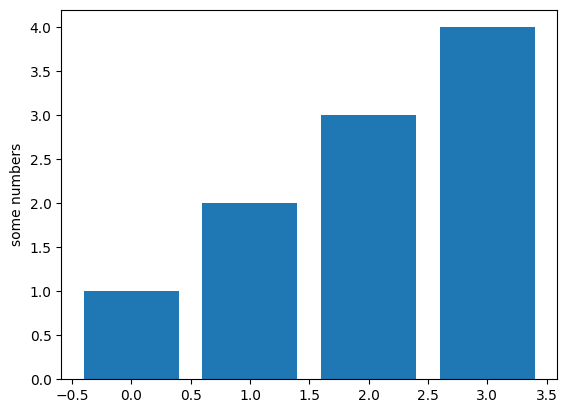

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(4)
y = np.array([1, 2, 3, 4])
plt.bar(x,y)
plt.ylabel('some numbers')
plt.show()

## 2. část - Využití t-SNE knihovny pro redukci dimenze dat

V této části je úkolem redukovat dimenzi vstupních vektorů a poté je vizualizovat. Jedná se o tzv. vektory mluvčích (x-vektory), které se často využívají při verifikaci mluvčího. Pokud tyto vektory fungují správně, tak by z vizualizace mělo být vidět, že se vektory stejných osob shlukují a zároveň jsou dostatečně vzdálené od vektorů ostatních osob.

Je potřeba vyřešit následující úlohy:
1. Načíst data, která byla uložena jako tuple (data, Y) pomocí knihovny pickle
    - je potřeba binárně otevřít soubor data.pk a správně načíst data
    - "data" ... jedná se o list obsahující vektory 5 osob, celková velikost je (25, 128)
        - v Y jsou labely osob pro jednotlivé vektory (0,0,0,0,0,1,1,1,1,1,2,2,...)
        
        
2. Použít t-SNE pro redukci dimenze dat do 2D (již naimportovaná knihovna), doporučuji přečíst si dokumentaci a podívat se na použití


3. Vizualizovat vektory ve 2D s použitím plotly knihovny, graf stačí zobrazit zde v notebooku


### Výsledek by měl vypadat přibližně takto
![output](sample_output.png)

In [3]:
from sklearn.manifold import TSNE
import plotly.express as px
import pickle as pk

In [4]:
# open a file, where you stored the pickled data
with open('data/data.pk', 'rb') as file:
    # dump information to that file
    data = pk.load(file)

vec = np.array(data[0])
y = np.array(data[1])

print(vec.shape)
print(y.shape)
#print(data)
#print(y)

tsne = TSNE(n_components=2, perplexity=5, random_state=1).fit_transform(vec)

# plt.scatter(tsne[:, 0], tsne[:, 1], c=y)
# plt.show()
plot = px.scatter(tsne[:, 0], tsne[:, 1], color=['person ' + str(x) for x in y])
plot.update_coloraxes(showscale=False)
plot.layout.template = 'plotly'
plot

(25, 128)
(25,)


/home/pytel/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/pytel/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## 3. část - Vizualizace libovolného datasetu

Poslední úloha je více otevřená. Můžete použít libovolný dataset a vytvořit libovolné vizualizace (alespoň 2).

Čerpat můžete z vlastního zdroje nebo např.:
- [Stanford Large Network Dataset Collection](http://snap.stanford.edu/data/index.html)
- [UCI Network Data Repository](https://networkdata.ics.uci.edu/)

Pokud vytvoříte složitější vizualizaci, nebo provedete zajímavou analýzu datasetu, tak můžete získat bonusový bod.

In [5]:
import os
import json

def load_data_from_json_file(file_path):
    data = {}
    with open(file_path) as json_file:
        data = json.load(json_file)
    return data

In [6]:
file_path = "data/covid-data.json"
data = load_data_from_json_file(file_path)

In [41]:
cz = data["CZE"]
us = data["USA"]

{'date': '2020-01-23', 'total_cases': 1.0, 'new_cases': 0.0, 'total_cases_per_million': 0.003, 'new_cases_per_million': 0.0, 'stringency_index': 0.0}

In [61]:
months_us = np.zeros(12)
total_cases_us = {}
new_cases_us = {}
for day in us["data"]:
    if int(day["date"].split("-")[0]) == 2020:
        #print(day)
        month = int(day["date"].split("-")[1])
        cases = day.get("new_cases", 0)
        months_us[month-1] += cases
        total_cases_us[day["date"]] = day['total_cases']
        new_cases_us[day["date"]] = day.get("new_cases_per_million", 0)

In [62]:
months_cz = np.zeros(12)
total_cases_cz = {}
new_cases_cz = {}
for day in cz["data"]:
    if int(day["date"].split("-")[0]) == 2020:
        #print(day)
        month = int(day["date"].split("-")[1])
        cases = day["new_cases"]
        months_cz[month-1] += cases
        total_cases_cz[day["date"]] = day['total_cases']
        new_cases_cz[day["date"]] = day['new_cases_per_million']
        
#print(total_cases_cz)

In [33]:
#print(list(total_cases_cz.items()))
#print(list(total_cases_cz.values()))

[     0.      0.   3308.   4374.   1586.   2686.   4620.   8044.  46145.
 264339. 188196. 195363.]
[7.000000e+00 1.700000e+01 1.920540e+05 8.889600e+05 7.099140e+05
 8.579520e+05 1.900715e+06 1.498160e+06 1.199936e+06 1.929405e+06
 4.491969e+06 6.552552e+06]


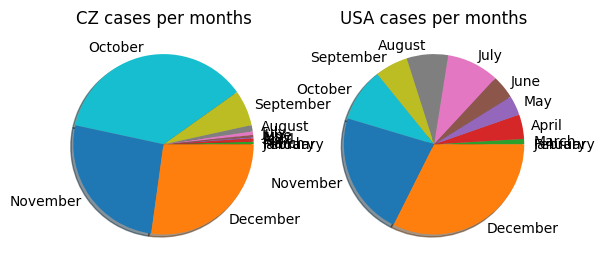

In [76]:
print(months_cz)
print(months_us)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.subplot(1, 2, 1)
plt.pie(months_cz, labels = months, shadow = True)
plt.title("CZ cases per months")
#plt.legend()
#plt.show()
plt.subplot(1, 2, 2)
plt.pie(months_us, labels = months, shadow = True)
plt.title("USA cases per months")
#plt.legend()
plt.show()

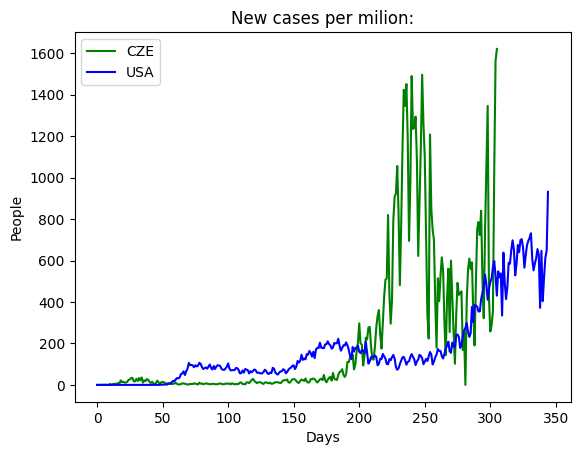

In [54]:
plt.plot(list(new_cases_cz.values()), color='g', label='CZE')
plt.plot(list(new_cases_us.values()), color='b', label='USA')

plt.xlabel("Days")
plt.ylabel("Cases per milion")
plt.title("New cases per milion:")

plt.legend()
plt.show()